In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests

In [10]:
Homicide_df_raw = pd.read_csv("Homicides Are Falling Around the World - Homicides Are Falling Around the World.csv")
Homicide_df_raw

Unnamed: 0 Intentional homicides (per 100,000 people)  Unnamed: 2  \
0           country           % change earliest to latest data     1995.00   
1           Croatia                                      -0.75        3.56   
2          Bulgaria                                      -0.70        5.91   
3       Netherlands                                      -0.69        1.94   
4        Kazakhstan                                      -0.69       15.36   
5            Poland                                      -0.68        2.22   
6           Albania                                      -0.66        6.69   
7             China                                      -0.65         NaN   
8           Georgia                                      -0.65        7.71   
9           Moldova                                      -0.65        9.10   
10  Slovak Republic                                      -0.62        2.38   
11         Colombia                                      -0.62       69.67   
12          Belarus                                      -0.61        9.34   
13   Czech Republic                                      -0.59        1.71   
14        Lithuania                                      -0.57       13.83   
15  Kyrgyz Republic                                      -0.56       11.65   
16          Romania                                      -0.55        3.34   
17            Italy                                      -0.55        1.78   
18           Serbia                                      -0.54         NaN   
19         Thailand                                      -0.54        7.61   
20          Germany                                      -0.53        1.72   
21          Austria                                      -0.52        1.03   
22        Indonesia                                      -0.50         NaN   
23          Ireland                                      -0.50        1.19   
24         Mongolia                                      -0.48         NaN   
25          Hungary                                      -0.48        2.87   
26          Morocco                                      -0.47         NaN   
27     South Africa                                      -0.47       64.92   
28         Slovenia                                      -0.46        2.24   
29            Japan                                      -0.45        0.54   
30        Australia                                      -0.44        1.80   
31         Paraguay                                      -0.44         NaN   
32          Finland                                      -0.44        2.86   
33           Greece                                      -0.43        1.41   
34          Ecuador                                      -0.43         NaN   
35      Switzerland                                      -0.40        1.17   
36    United States                                      -0.40        8.11   
37           Norway                                      -0.39        0.99   
38   United Kingdom                                      -0.39        1.47   
39   Macedonia, FYR                                      -0.34         NaN   
40           Israel                                      -0.33        2.10   
41            Spain                                      -0.33        1.04   
42            Libya                                      -0.32         NaN   
43      Puerto Rico                                      -0.32       23.34   
44           France                                      -0.31        2.31   
45          Armenia                                      -0.31        3.60   
46          Algeria                                      -0.30         NaN   
47            India                                      -0.27        4.37   
48      El Salvador                                      -0.22      139.13   
49           Panama                                      -0.19       14.08   
50     Sierra Leone            

In [11]:
new_header = Homicide_df_raw.iloc[0] 
Homicide_df = Homicide_df_raw[1:] 
Homicide_df.columns = new_header
Homicide_df

0           country % change earliest to latest data  1995.0  1996.0  1997.0  \
1           Croatia                            -0.75    3.56    2.62    2.55   
2          Bulgaria                            -0.70    5.91    5.29    4.85   
3       Netherlands                            -0.69    1.94    1.36    1.33   
4        Kazakhstan                            -0.69   15.36   16.71   16.67   
5            Poland                            -0.68    2.22    2.27    2.10   
6           Albania                            -0.66    6.69    7.97   49.87   
7             China                            -0.65     NaN     NaN     NaN   
8           Georgia                            -0.65    7.71    5.41    5.79   
9           Moldova                            -0.65    9.10    9.29    9.32   
10  Slovak Republic                            -0.62    2.38    2.45    2.60   
11         Colombia                            -0.62   69.67   71.79   67.18   
12          Belarus                            -0.61    9.34    9.47   10.01   
13   Czech Republic                            -0.59    1.71    1.68    1.82   
14        Lithuania                            -0.57   13.83   11.24   10.93   
15  Kyrgyz Republic                            -0.56   11.65   11.14    9.26   
16          Romania                            -0.55    3.34    3.20    3.08   
17            Italy                            -0.55    1.78    1.67    1.53   
18           Serbia                            -0.54     NaN     NaN     NaN   
19         Thailand                            -0.54    7.61    7.42    7.86   
20          Germany                            -0.53    1.72    1.68    1.54   
21          Austria                            -0.52    1.03    1.24    0.83   
22        Indonesia                            -0.50     NaN     NaN     NaN   
23          Ireland                            -0.50    1.19    1.15    1.04   
24         Mongolia                            -0.48     NaN     NaN     NaN   
25          Hungary                            -0.48    2.87    2.63    2.81   
26          Morocco                            -0.47     NaN     NaN     NaN   
27     South Africa                            -0.47   64.92   60.39   57.11   
28         Slovenia                            -0.46    2.24    1.93    1.82   
29            Japan                            -0.45    0.54    0.49    0.54   
30        Australia                            -0.44    1.80    1.70    1.73   
31         Paraguay                            -0.44     NaN     NaN     NaN   
32          Finland                            -0.44    2.86    2.99    2.70   
33           Greece                            -0.43    1.41    1.57    1.88   
34          Ecuador                            -0.43     NaN     NaN     NaN   
35      Switzerland                            -0.40    1.17    1.18    1.23   
36    United States                            -0.40    8.11    7.29    6.68   
37           Norway                            -0.39    0.99    0.98    0.86   
38   United Kingdom                            -0.39    1.47    1.32    1.43   
39   Macedonia, FYR                            -0.34     NaN     NaN     NaN   
40           Israel                            -0.33    2.10    2.13    2.77   
41            Spain                            -0.33    1.04    1.00    1.17   
42            Libya                            -0.32     NaN     NaN     NaN   
43      Puerto Rico                            -0.32   23.34   23.26   19.25   
44           France                            -0.31    2.31    2.02    1.65   
45          Armenia                            -0.31    3.60    3.59    3.19   
46          Algeria                            -0.30     NaN     NaN     NaN   
47            India                            -0.27    4.37    4.40    4.35   
48      El Salvador                            -0.22  139.13  117.28  112.57   
49           Panama                            -0.19   14.08    9.08   11.30   


In [12]:
Homicide_df_final = Homicide_df.drop(columns=["source", "URL"])
Homicide_df_final = Homicide_df_final.rename(columns={"country": "Name"})
Homicide_df_final

0              Name % change earliest to latest data  1995.0  1996.0  1997.0  \
1           Croatia                            -0.75    3.56    2.62    2.55   
2          Bulgaria                            -0.70    5.91    5.29    4.85   
3       Netherlands                            -0.69    1.94    1.36    1.33   
4        Kazakhstan                            -0.69   15.36   16.71   16.67   
5            Poland                            -0.68    2.22    2.27    2.10   
6           Albania                            -0.66    6.69    7.97   49.87   
7             China                            -0.65     NaN     NaN     NaN   
8           Georgia                            -0.65    7.71    5.41    5.79   
9           Moldova                            -0.65    9.10    9.29    9.32   
10  Slovak Republic                            -0.62    2.38    2.45    2.60   
11         Colombia                            -0.62   69.67   71.79   67.18   
12          Belarus                            -0.61    9.34    9.47   10.01   
13   Czech Republic                            -0.59    1.71    1.68    1.82   
14        Lithuania                            -0.57   13.83   11.24   10.93   
15  Kyrgyz Republic                            -0.56   11.65   11.14    9.26   
16          Romania                            -0.55    3.34    3.20    3.08   
17            Italy                            -0.55    1.78    1.67    1.53   
18           Serbia                            -0.54     NaN     NaN     NaN   
19         Thailand                            -0.54    7.61    7.42    7.86   
20          Germany                            -0.53    1.72    1.68    1.54   
21          Austria                            -0.52    1.03    1.24    0.83   
22        Indonesia                            -0.50     NaN     NaN     NaN   
23          Ireland                            -0.50    1.19    1.15    1.04   
24         Mongolia                            -0.48     NaN     NaN     NaN   
25          Hungary                            -0.48    2.87    2.63    2.81   
26          Morocco                            -0.47     NaN     NaN     NaN   
27     South Africa                            -0.47   64.92   60.39   57.11   
28         Slovenia                            -0.46    2.24    1.93    1.82   
29            Japan                            -0.45    0.54    0.49    0.54   
30        Australia                            -0.44    1.80    1.70    1.73   
31         Paraguay                            -0.44     NaN     NaN     NaN   
32          Finland                            -0.44    2.86    2.99    2.70   
33           Greece                            -0.43    1.41    1.57    1.88   
34          Ecuador                            -0.43     NaN     NaN     NaN   
35      Switzerland                            -0.40    1.17    1.18    1.23   
36    United States                            -0.40    8.11    7.29    6.68   
37           Norway                            -0.39    0.99    0.98    0.86   
38   United Kingdom                            -0.39    1.47    1.32    1.43   
39   Macedonia, FYR                            -0.34     NaN     NaN     NaN   
40           Israel                            -0.33    2.10    2.13    2.77   
41            Spain                            -0.33    1.04    1.00    1.17   
42            Libya                            -0.32     NaN     NaN     NaN   
43      Puerto Rico                            -0.32   23.34   23.26   19.25   
44           France                            -0.31    2.31    2.02    1.65   
45          Armenia                            -0.31    3.60    3.59    3.19   
46          Algeria                            -0.30     NaN     NaN     NaN   
47            India                            -0.27    4.37    4.40    4.35   
48      El Salvador                            -0.22  139.13  117.28  112.57   
49           Panama                            -0.19   14.08    9.08   11.30   


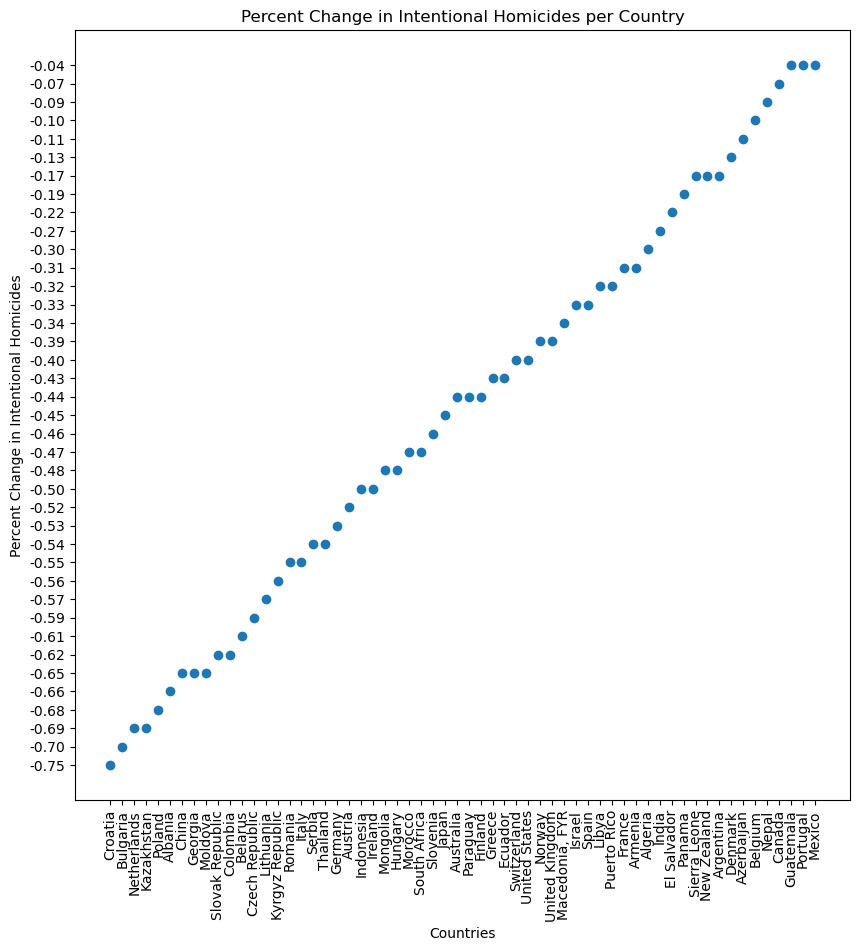

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(Homicide_df_final["Name"],Homicide_df_final["% change earliest to latest data"])
plt.xticks(Homicide_df_final["Name"],rotation=90)
plt.xlabel("Countries")
plt.ylabel("Percent Change in Intentional Homicides")
plt.title("Percent Change in Intentional Homicides per Country")
plt.savefig("Images/Fig1.png")
plt.show()

In [14]:
#Export data from csv
GDP_raw_data=pd.read_csv("GDP_data via country.csv")
Incomegroup_raw=pd.read_csv("Country_via IncomeGroup.csv")

#delete unwanted rows to created the column header, reindex starting from 0
GDP_raw_data=GDP_raw_data.drop([0,1,2])
GDP_raw_data.reset_index(inplace=True,drop=True)

header=GDP_raw_data.iloc[0]
GDP_data=GDP_raw_data[1:]
GDP_data.columns=header

#Merge GDP and Incomegroup data and drop unwanted columns (via column name and index number)
GDP_income_merge=pd.merge(GDP_data, Incomegroup_raw)

GDP_income_merge.drop(columns=["Indicator Name", "Indicator Code","Unnamed: 5", "Region", "SpecialNotes", "TableName"],axis=1, inplace=True)
GDP_income_merge=GDP_income_merge.drop(GDP_income_merge.iloc[:, 2:37], axis=1)
GDP_income_merge_df=GDP_income_merge.drop(GDP_income_merge.iloc[:, 23:30], axis=1)

#Drop missing values column and rows
GDP_income_merge=GDP_income_merge_df.dropna(axis=1,how="all")
GDP_income_merge_drop=GDP_income_merge.dropna()

#Displays all the rows in dataframe and sort in alphabetical order via country name
pd.set_option("display.max_rows", None)
GDP_income_merge_sort=GDP_income_merge_drop.sort_values("Country Name")
GDP_income_merge_sort
GDP_income_merge_sort.reset_index(inplace=True,drop=True)
GDP_income_merge_sort



Country Name Country Code        1995.0        1996.0  \
0                           Albania          ALB    750.604449   1009.977114   
1                           Algeria          DZA   1466.544691   1619.532403   
2                           Andorra          AND  18731.650685  19081.537962   
3                            Angola          AGO    399.735558    523.310909   
4               Antigua and Barbuda          ATG   8440.034526   9079.481212   
5                         Argentina          ARG   7383.704510   7690.157003   
6                           Armenia          ARM    441.894002    484.091641   
7                             Aruba          ABW  17140.433369  17375.225306   
8                         Australia          AUS  20446.719847  22020.079799   
9                           Austria          AUT  30325.849582  29809.076773   
10                       Azerbaijan          AZE    314.558197    409.185623   
11                     Bahamas, The          BHS  11447.017900  11835.386790   
12                          Bahrain          BHR   9543.390109   9643.309528   
13                       Bangladesh          BGD    322.087390    387.384863   
14                         Barbados          BRB   8451.958599   8994.324063   
15                          Belarus          BLR   1370.699283   1452.507105   
16                          Belgium          BEL  28413.826439  27489.555177   
17                           Belize          BLZ   4021.006504   4057.853603   
18                            Benin          BEN    358.822987    380.588287   
19                          Bermuda          BMU  33989.723161  44826.789070   
20                           Bhutan          BTN    550.656234    564.486939   
21                          Bolivia          BOL    856.365113    925.849119   
22           Bosnia and Herzegovina          BIH    497.682847    712.953646   
23                         Botswana          BWA   3064.586353   3063.994873   
24                           Brazil          BRA   4704.961546   5121.905407   
25                Brunei Darussalam          BRN  15827.987364  16706.471326   
26                         Bulgaria          BGR   2259.264831   1470.195347   
27                     Burkina Faso          BFA    229.832660    243.526923   
28                          Burundi          BDI    168.627168    146.536183   
29                       Cabo Verde          CPV   1184.176735   1192.329989   
30                         Cambodia          KHM    315.142348    313.584672   
31                         Cameroon          CMR    822.363213    817.184094   
32                           Canada          CAN  20678.950442  21296.634422   
33         Central African Republic          CAF    340.399680    299.619490   
34                             Chad          TCD    209.892600    223.233388   
35                            Chile          CHL   5094.505484   5376.149433   
36                            China          CHN    609.604362    709.415888   
37                         Colombia          COL   2571.468190   2652.103881   
38                          Comoros          COM    823.676610    801.261221   
39                 Congo, Dem. Rep.          COD    130.376256    130.816496   
40                      Congo, Rep.          COG    771.613946    902.045746   
41                       Costa Rica          CRI   3240.711145   3194.112988   
42                    Cote d'Ivoire          CIV    769.255684   1220.121444   
43                          Croatia          HRV   4930.337203   5298.886377   
44                             Cuba          CUB   2784.902605   2281.975550   
45                           Cyprus          CYP  15261.410156  15139.226562   
46                          Czechia          CZE   5823.974997   6532.905243   
47                          Denmark          DNK  35351.575797  35650.888282   
48                         Djibouti          DJI    790.516107    766.315697   
49                     

In [113]:
#Rename columns/column entry
GDP_income_merge_sort=GDP_income_merge_sort.rename(columns={"IncomeGroup":"Country's Income tier"})
GDP_income_merge_group=GDP_income_merge_sort.groupby("Country's Income tier",sort=True, group_keys=True).apply(lambda x: x)

#GDP_income_merge_group
#GDP_income_merge_group.reset_index(inplace=True, drop=True)
GDP_income_merge_group

Country Name Country Code  \
Country's Income tier                                                    
High income           2                           Andorra          AND   
                      4               Antigua and Barbuda          ATG   
                      7                             Aruba          ABW   
                      8                         Australia          AUS   
                      9                           Austria          AUT   
                      11                     Bahamas, The          BHS   
                      12                          Bahrain          BHR   
                      14                         Barbados          BRB   
                      16                          Belgium          BEL   
                      19                          Bermuda          BMU   
                      25                Brunei Darussalam          BRN   
                      32                           Canada          CAN   
                      35                            Chile          CHL   
                      43                          Croatia          HRV   
                      45                           Cyprus          CYP   
                      46                          Czechia          CZE   
                      47                          Denmark          DNK   
                      55                          Estonia          EST   
                      59                          Finland          FIN   
                      60                           France          FRA   
                      61                 French Polynesia          PYF   
                      65                          Germany          DEU   
                      67                           Greece          GRC   
                      68                        Greenland          GRL   
                      73                           Guyana          GUY   
                      76             Hong Kong SAR, China          HKG   
                      77                          Hungary          HUN   
                      78                          Iceland          ISL   
                      83                          Ireland          IRL   
                      84                      Isle of Man          IMN   
                      85                           Israel          ISR   
                      86                            Italy          ITA   
                      88                            Japan          JPN   
                      93                      Korea, Rep.          KOR   
                      94                           Kuwait          KWT   
                      97                           Latvia          LVA   
                      101                   Liechtenstein          LIE   
                      102                       Lithuania          LTU   
                      103                      Luxembourg          LUX   
                      104                Macao SAR, China          MAC   
                      110                           Malta          MLT   
                      117                          Monaco          MCO   
                      124                     Netherlands          NLD   
                      125                   New Caledonia          NCL   
                      126                     New Zealand          NZL   
                      131                          Norway          NOR   
                      132                            Oman          OMN   
                      134                          Panama          PAN   
                      139                          Poland          POL   
                      140                        Portugal          PRT   
                      141                     Puerto Rico          PRI   
                      142                           Qatar          QAT   
                      143                        

In [118]:
#Find average percent change per year of all data values in a column using 'for' loop
column_avg=0
GDP_j=[]
GDP_j1=[]
GDP_sum=[]
#counter=0
for row in GDP_income_merge_sort.iterrows():
    for column in GDP_income_merge_sort.columns[2:23]:
        #counter=counter+1
        GDP_j.append(GDP_income_merge_sort[column])
#         if counter==0:
#             column_avg
#         else:
    Avg_Percent_Increase=((((GDP_j[1]-GDP_j[0])/GDP_j[0])+((GDP_j[2]-GDP_j[1])/GDP_j[1])+((GDP_j[3]-GDP_j[2])/GDP_j[2])+((GDP_j[4]-GDP_j[3])/GDP_j[3])+((GDP_j[5]-GDP_j[4])/GDP_j[4])+((GDP_j[6]-GDP_j[5])/GDP_j[5])+((GDP_j[7]-GDP_j[6])/GDP_j[6])+((GDP_j[8]-GDP_j[7])/GDP_j[7])+((GDP_j[9]-GDP_j[8])/GDP_j[8])+((GDP_j[10]-GDP_j[9])/GDP_j[9])+((GDP_j[11]-GDP_j[10])/GDP_j[10])+((GDP_j[12]-GDP_j[11])/GDP_j[11])+((GDP_j[13]-GDP_j[12])/GDP_j[12])+((GDP_j[14]-GDP_j[13])/GDP_j[13])+((GDP_j[15]-GDP_j[14])/GDP_j[14])+((GDP_j[16]-GDP_j[15])/GDP_j[15])+((GDP_j[17]-GDP_j[16])/GDP_j[16])+((GDP_j[18]-GDP_j[17])/GDP_j[17])+((GDP_j[19]-GDP_j[18])/GDP_j[18])+((GDP_j[20]-GDP_j[19])/GDP_j[19]))/20)*100
    GDP_j1.append(Avg_Percent_Increase)
    #column_avg=GDP_j[2]-GDP_j[1]
        #counter=1
        #GDP_j1.append(column_average)
        #print(GDP_j)
        #print(GDP_j1)
    #print(column_avg)
    #print(column_avg)
GDP_j1[0]
    
    



0       9.808016
1       6.257869
2       4.214535
3      13.850396
4       3.050531
5       6.127592
6      12.311641
7       2.669728
8       5.919733
9       2.306937
10     17.414265
11      5.765451
12      4.917093
13      7.103717
14      3.658306
15      9.021469
16      2.241522
17      2.185616
18      6.183944
19      5.964444
20      8.563708
21      6.723367
22     12.563623
23      3.943484
24      4.723286
25      4.812199
26      7.309604
27      5.765057
28      3.142681
29      5.884564
30      7.026543
31      3.087387
32      4.157107
33      0.882071
34      8.326223
35      5.660193
36     13.947552
37      5.369582
38      2.851622
39     16.753080
40      7.631341
41      6.700082
42      5.605635
43      5.177618
44      5.438625
45      2.656166
46      6.404497
47      2.437580
48      6.173481
49      3.440276
50      6.816767
51      6.229495
52      7.018223
53      4.557333
54     25.389221
55      9.780907
56      4.523014
57      8.833457
58      4.4001

In [124]:
#Dataframe for Pertinent Categories
Avg_Percent_Increase_df=pd.DataFrame({"Country":GDP_income_merge_sort["Country Name"],"Average % change in GDP per year(1995-2015)":GDP_j1[0], "Country's Income Tier":GDP_income_merge_sort["Country's Income tier"]})
Avg_Percent_Increase_df.groupby("Country's Income Tier",sort=True, group_keys=True).apply(lambda x: x)


Country  \
Country's Income Tier                                       
High income           2                           Andorra   
                      4               Antigua and Barbuda   
                      7                             Aruba   
                      8                         Australia   
                      9                           Austria   
                      11                     Bahamas, The   
                      12                          Bahrain   
                      14                         Barbados   
                      16                          Belgium   
                      19                          Bermuda   
                      25                Brunei Darussalam   
                      32                           Canada   
                      35                            Chile   
                      43                          Croatia   
                      45                           Cyprus   
                      46                          Czechia   
                      47                          Denmark   
                      55                          Estonia   
                      59                          Finland   
                      60                           France   
                      61                 French Polynesia   
                      65                          Germany   
                      67                           Greece   
                      68                        Greenland   
                      73                           Guyana   
                      76             Hong Kong SAR, China   
                      77                          Hungary   
                      78                          Iceland   
                      83                          Ireland   
                      84                      Isle of Man   
                      85                           Israel   
                      86                            Italy   
                      88                            Japan   
                      93                      Korea, Rep.   
                      94                           Kuwait   
                      97                           Latvia   
                      101                   Liechtenstein   
                      102                       Lithuania   
                      103                      Luxembourg   
                      104                Macao SAR, China   
                      110                           Malta   
                      117                          Monaco   
                      124                     Netherlands   
                      125                   New Caledonia   
                      126                     New Zealand   
                      131                          Norway   
                      132                            Oman   
                      134                          Panama   
                      139                          Poland   
                      140                        Portugal   
                      141                     Puerto Rico   
                      142                           Qatar   
                      143                         Romania   
                      147                    Saudi Arabia   
                      150                      Seychelles   
                      152                       Singapore   
                      153                 Slovak Republic   
                      154                        Slovenia   
                      157                           Spain   
                      159             St. Kitts and Nevis   
                      164                          Sweden   
                      165                     Switzerland   
                      172             Trinidad and Tobago   
                      179            United Arab Emirates   
                      18

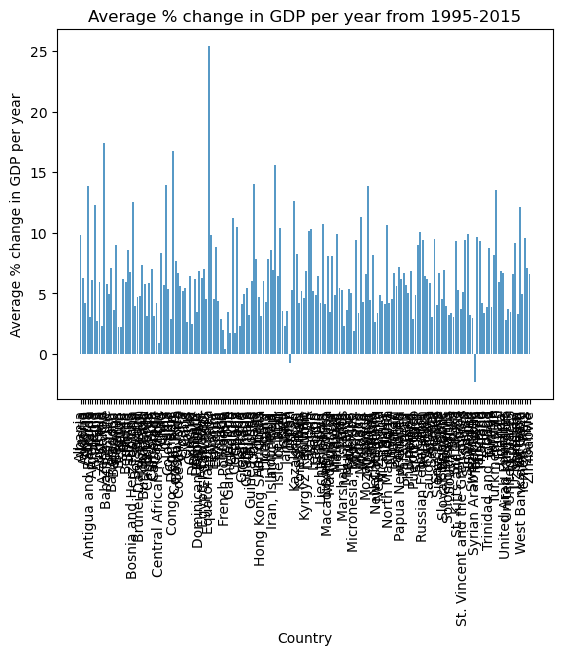

In [127]:
x_axis=Avg_Percent_Increase_df["Country"]
y_axis=Avg_Percent_Increase_df["Average % change in GDP per year(1995-2015)"]
plt.bar(x_axis, y_axis, alpha=0.75,align="center")
plt.xlabel("Country")
plt.ylabel("Average % change in GDP per year")
plt.xticks(rotation="vertical")
plt.title("Average % change in GDP per year from 1995-2015")
plt.show()

In [45]:
Freedom_df_raw = pd.read_csv("freedom-scores.csv")
Freedom_df = Freedom_df_raw.dropna(subset=['Overall Score'])
Freedom_df

Id                              Name               Short Name ISO Code  \
1       2                           Albania                  Albania       AL   
2       3                           Algeria                  Algeria       DZ   
3       4                            Angola                   Angola       AO   
4       5                         Argentina                Argentina       AR   
5       6                           Armenia                  Armenia       AM   
6       7                         Australia                Australia       AU   
7       8                           Austria                  Austria       AT   
8       9                        Azerbaijan               Azerbaijan       AZ   
9      10                       The Bahamas                  Bahamas       BS   
10     11                           Bahrain                  Bahrain       BH   
11     12                        Bangladesh               Bangladesh       BD   
12     13                          Barbados                 Barbados       BB   
13     14                           Belarus                  Belarus       BY   
14     15                           Belgium                  Belgium       BE   
15     16                            Belize                   Belize       BZ   
16     17                             Benin                    Benin       BJ   
17     18                            Bhutan                   Bhutan       BT   
18     19                           Bolivia                  Bolivia       BO   
19     20            Bosnia and Herzegovina        BosniaHerzegovina       BA   
20     21                          Botswana                 Botswana       BW   
21     22                            Brazil                   Brazil       BR   
22     23                          Bulgaria                 Bulgaria       BG   
23     24                      Burkina Faso              BurkinaFaso       BF   
24     25                             Burma                    Burma       MM   
25     26                           Burundi                  Burundi       BI   
26     27                          Cambodia                 Cambodia       KH   
27     28                          Cameroon                 Cameroon       CM   
28     29                            Canada                   Canada       CA   
29     30                        Cabo Verde                CaboVerde       CV   
30     31          Central African Republic   CentralAfricanRepublic       CF   
31     32                              Chad                     Chad       TD   
32     33                             Chile                    Chile       CL   
33     34                             China                    China       CN   
34     35                          Colombia                 Colombia       CO   
35     36                           Comoros                  Comoros       KM   
36     37      Democratic Republic of Congo  DemocraticRepublicCongo       CD   
37     38                 Republic of Congo            RepublicCongo       CG   
38     39                        Costa Rica                CostaRica       CR   
39     40                     Côte d'Ivoire              CoteDivoire       CI   
40     41                           Croatia                  Croatia       HR   
41     42                              Cuba                     Cuba       CU   
42     43                            Cyprus                   Cyprus       CY   
43     44                    Czech Republic            CzechRepublic       CZ   
44     45                           Denmark                  Denmark       DK   
45     46                          Djibouti                 Djibouti       DJ   
46     47                          Dominica                 Dominica       DM   
47     48                Dominican Republic        DominicanRepublic       DO   
48     49                           Ecuador                  Ecuador       EC   
49     50                             

In [ ]:
Freedom_df_final = Freedom_df.loc[(Freedom_df["Index Year"] == 2015)]
Freedom_df_final = Freedom_df_final.drop([1572])
Freedom_df_final

In [ ]:
Country = []
Percentfreedomscore = []
for i in Freedom_df_final["Name"].unique():
        Percentfreedomscore.append(((Freedom_df.loc[(Freedom_df["Index Year"] == 2015) & (Freedom_df["Name"] == i)]["Overall Score"].reset_index(drop=True) - Freedom_df.loc[(Freedom_df["Index Year"] == Freedom_df.loc[Freedom_df["Name"] == i]["Index Year"].min()) & (Freedom_df["Name"] == i)]["Overall Score"].reset_index(drop=True)) / Freedom_df.loc[(Freedom_df["Index Year"] == 2015) & (Freedom_df["Name"] == i)]["Overall Score"].reset_index(drop=True)).iloc[0])
        Country.append(i)      
Percentfreedomscore = np.round(Percentfreedomscore, 2)
Percentfreedomscore = Percentfreedomscore * 100
Percentfreedomscore_df = pd.DataFrame({"Country": Country,
                                      "% Change in Freedom Score": Percentfreedomscore})
Percentfreedomscore_df = Percentfreedomscore_df.sort_values(by="% Change in Freedom Score", ascending=False)
Percentfreedomscore_df

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(Country,Percentfreedomscore_df["% Change in Freedom Score"])
plt.xticks(Country,rotation=90)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel("Countries")
plt.ylabel("Percent Change in Freedom Score")
plt.title("Percent Change in Freedom Score per Country")
plt.savefig("Images/Fig2.png")
plt.show()

In [ ]:
countryarray = ["Poland", "Kazakhstan", "Colombia", "Croatia", "United States"]

In [ ]:
FreedomSnapshot_df = Freedom_df.loc[(Freedom_df["Name"] == "Croatia") | (Freedom_df["Name"] == "Colombia") | (Freedom_df["Name"] == "Kazakhstan") | (Freedom_df["Name"] == "Poland") | (Freedom_df["Name"] == "United States")]
FreedomSnapshot_df = FreedomSnapshot_df.loc[(FreedomSnapshot_df["Index Year"] >= 1995)  & (FreedomSnapshot_df["Index Year"] <= 2015)]
FreedomSnapshot_df

In [ ]:
HomicideSnapshot_df = Homicide_df_final.loc[(Homicide_df_final["Name"] == "Croatia") | (Homicide_df_final["Name"] == "Colombia") | (Homicide_df_final["Name"] == "Kazakhstan") | (Homicide_df_final["Name"] == "Poland") | (Homicide_df_final["Name"] == "United States")]
HomicideSnapshot_df = HomicideSnapshot_df.reindex([5,4,11,1,36])
HomicideSnapshot_df

In [ ]:
changeinhomicides = []
for i in HomicideSnapshot_df["Name"]:
    changeinhomicides.append(HomicideSnapshot_df.loc[HomicideSnapshot_df["Name"] == i][1995].iloc[0] - HomicideSnapshot_df.loc[HomicideSnapshot_df["Name"] == i][2015].iloc[0])
changeinhomicides = np.round(changeinhomicides,2)*-1
changeinhomicides

In [ ]:
changefreedomscore = []
for i in countryarray:
    changefreedomscore.append(Percentfreedomscore_df.loc[Percentfreedomscore_df["Country"] == i]["% Change in Freedom Score"].iloc[0])
changefreedomscore

In [ ]:
colordict = {"Poland": "g",
            "Kazakhstan":"y",
            "Colombia":"r",
            "Croatia":"b",
            "United States":"m"}
colordict

In [ ]:
combinded_df = pd.DataFrame({
    "Country Name" : countryarray,
    "% Change in Homicides" : HomicideSnapshot_df["% change earliest to latest data"],
    "# Change in Homicides (per 100k)" : changeinhomicides,
    '% Change in Overall Freedom Score' : changefreedomscore
})
combinded_df["% Change in Homicides"] = pd.to_numeric(combinded_df["% Change in Homicides"])
combinded_df["% Change in Homicides"] = combinded_df["% Change in Homicides"]*100
combinded_df

In [ ]:
plt.bar(combinded_df["Country Name"], combinded_df["% Change in Homicides"], color ='r', width = .25,
        edgecolor ='grey')
plt.bar(combinded_df["Country Name"], combinded_df["% Change in Overall Freedom Score"], color ='g', width = .25,
        edgecolor ='grey')
plt.ylim([-80, 40])
plt.legend(["% Change in Homicides","% Change in Overall Freedom Score"],loc='best', fontsize = 'small')
plt.xlabel("Countries")
plt.ylabel("Percent Change")
plt.title("% change in homicides vs. % change in freedom scores of select countries")
plt.savefig("Images/Fig3.png")
plt.show()